In [45]:
%pylab inline
from numba import jit,njit
from scipy.fft import *
import scipy 
import seaborn as sns
from scipy.integrate import solve_ivp #for vector forms
from scipy import integrate
import seaborn as sns
import ipywidgets as ipw
import pickle
sns.set()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\weisz\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'rfftn', 'rfft', 'fft', 'irfft2', 'irfftn', 'ihfft', 'hfft', 'irfft', 'ifft2', 'rfft2', 'ifft', 'ifftn', 'fft2', 'fftn']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [46]:
class OscillatorSimulator:
    def __init__(self, t,w_2, g, A, w,n_A):
        self.t = t
        self.w_2 = w_2
        self.g = g
        self.A = A
        self.w = w
        self.n_A = n_A

    @staticmethod
    
    def noise_gauss():
        return normal(0, 1)

    @staticmethod
    
    def white_noise_uniform():
        return uniform(0, 1)

    @staticmethod
    
    def pink_noise():
        coef1 = [0.09922035, -0.095993537, 0.050612699, -0.004408786]
        coef2 = [1, -2.494956002, 2.017265875, -0.522189400]

        pink_noise = uniform(0, 1)
        pink_noise = convolve(pink_noise, coef1)
        pink_noise = convolve(pink_noise, coef2, mode='valid')
        return pink_noise / 0.091420942
    
#clear oscillators
    @jit(forceobj=True)
    def harmonic(self, t, u):
        #eta = self.n_A * self.noise_gauss()
        sol_har = [u[1], -self.w_2 * u[0] ]
        return sol_har

    @jit(forceobj=True)
    def damped(self, t, u):
        #eta = self.n_A *  self.noise_gauss()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) ]
        return sol_dam

    @jit(forceobj=True)
    def driven(self, t, u):
        #eta = self.n_A *  self.noise_gauss()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] ]
        return sol_driv
       
    
#gauss/normal distribution
    @jit(forceobj=True)
    def harmonic_oscillator(self, t, u):
        eta = self.n_A * self.noise_gauss()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator(self, t, u):
        eta = self.n_A *  self.noise_gauss()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator(self, t, u):
        eta = self.n_A *  self.noise_gauss()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv
    
#white noise / uniform distribution
    @jit(forceobj=True)
    def harmonic_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv        

#pink/ f^{-1} noise

    @jit(forceobj=True)
    def harmonic_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv


In [47]:
def writer(name,obj):
    file = open(name+'.pkl','wb')
    pickle.dump(obj, file)
    file.close()

In [48]:
t=linspace(0,10,100);u = [0, 1]
#simulator0 = OscillatorSimulator(t,w_2=2.25, g=.05, A=1, w=1) dead
simulator1 = OscillatorSimulator(t,w_2=1, g=.05, A=1, w=1,n_A=1)
simulator2 = OscillatorSimulator(t,w_2=0.25, g=1.5, A=5, w=pi,n_A=2.2)
simulator3 = OscillatorSimulator(t,w_2=10.5, g=.75, A=2, w=0.2,n_A=1.8)
simulator4 = OscillatorSimulator(t,w_2=1.5, g=.22, A=0.2, w=1,n_A=1.9)
t=linspace(0,50,800);u = [0, 1]
simulator5 = OscillatorSimulator(t,w_2=2.25, g=.05, A=1, w=1,n_A=1)
simulator6 = OscillatorSimulator(t,w_2=0.25, g=1.5, A=5, w=pi,n_A=2.2)
simulator7 = OscillatorSimulator(t,w_2=10.5, g=.75, A=2, w=0.2,n_A=1.8)

In [58]:
#always rewrite the simulator NUMBER
t=linspace(0,50,800);u = [0, 1]
#simulator0 = OscillatorSimulator(t,w_2=2.25, g=.05, A=1, w=1) dead
clear_h5= solve_ivp(simulator5.harmonic, [0,800], y0 = u, t_eval = t)
writer('clear_h5',clear_h5)
clear_d5= solve_ivp(simulator5.damped, [0,800], y0 = u, t_eval = t)
writer('clear_d5',clear_d5)
clear_dr5= solve_ivp(simulator5.driven, [0,800], y0 = u, t_eval = t)
writer('clear_dr5',clear_dr5)
clear_h6= solve_ivp(simulator6.harmonic, [0,800], y0 = u, t_eval = t)
writer('clear_h6',clear_h6)
clear_d6= solve_ivp(simulator6.damped, [0,800], y0 = u, t_eval = t)
writer('clear_d6',clear_d6)
clear_dr6= solve_ivp(simulator6.driven, [0,800], y0 = u, t_eval = t)
writer('clear_dr6',clear_dr6)
clear_h7= solve_ivp(simulator7.harmonic, [0,800], y0 = u, t_eval = t)
writer('clear_h7',clear_h7)
clear_d7= solve_ivp(simulator7.damped, [0,800], y0 = u, t_eval = t)
writer('clear_d7',clear_d7)
clear_dr7= solve_ivp(simulator7.driven, [0,800], y0 = u, t_eval = t)
writer('clear_dr7',clear_dr7)

In [59]:
sol_h1= solve_ivp(simulator1.harmonic_oscillator, [0,800], y0 = u, t_eval = t)
sol_d1= solve_ivp(simulator1.damped_oscillator, [0,800], y0 = u, t_eval = t)
sol_dr1= solve_ivp(simulator1.driven_oscillator, [0,800], y0 = u, t_eval = t)
sol_h_g1= solve_ivp(simulator1.harmonic_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_d_g1= solve_ivp(simulator1.damped_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_dr_g1= solve_ivp(simulator1.driven_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_h_p1= solve_ivp(simulator1.harmonic_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_d_p1= solve_ivp(simulator1.damped_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_dr_p1= solve_ivp(simulator1.driven_oscillator_pink, [0,800], y0 = u, t_eval = t)
writer('sol_h5',sol_h1)
writer('sol_d5',sol_d1)
writer('sol_dr5',sol_dr1)
writer('sol_h_g5',sol_h_g1)
writer('sol_d_g5',sol_d_g1)
writer('sol_dr_g5',sol_dr_g1)
writer('sol_h_p5',sol_h_p1)
writer('sol_d_p5',sol_d_p1)
writer('sol_dr_p5',sol_dr_p1)
plot(sol_h1.t,sol_dr_g1.y[1])


KeyboardInterrupt



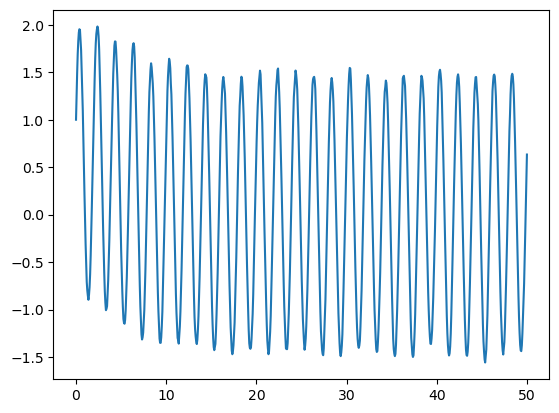

In [7]:
sol_h2= solve_ivp(simulator2.harmonic_oscillator, [0,800], y0 = u, t_eval = t)
sol_d2= solve_ivp(simulator2.damped_oscillator, [0,800], y0 = u, t_eval = t)
sol_dr2= solve_ivp(simulator2.driven_oscillator, [0,800], y0 = u, t_eval = t)
sol_h_g2= solve_ivp(simulator2.harmonic_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_d_g2= solve_ivp(simulator2.damped_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_dr_g2= solve_ivp(simulator2.driven_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_h_p2= solve_ivp(simulator2.harmonic_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_d_p2= solve_ivp(simulator2.damped_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_dr_p2= solve_ivp(simulator2.driven_oscillator_pink, [0,800], y0 = u, t_eval = t)
writer('sol_h6',sol_h2)
writer('sol_d6',sol_d2)
writer('sol_dr6',sol_dr2)
writer('sol_h_g6',sol_h_g2)
writer('sol_d_g6',sol_d_g2)
writer('sol_dr_g6',sol_dr_g2)
writer('sol_h_p6',sol_h_p2)
writer('sol_d_p6',sol_d_p2)
writer('sol_dr_p6',sol_dr_p2)
plot(sol_h2.t,sol_dr_g2.y[1])

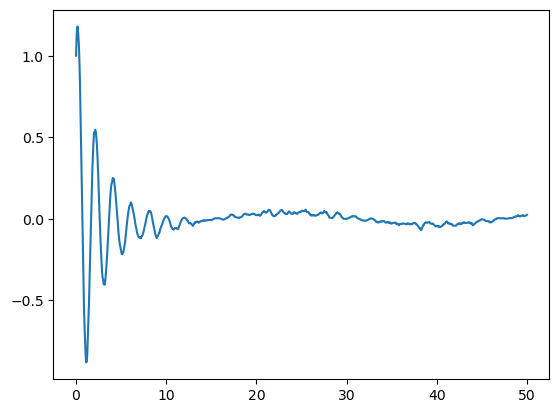

In [8]:
sol_h3= solve_ivp(simulator3.harmonic_oscillator, [0,800], y0 = u, t_eval = t)
sol_d3= solve_ivp(simulator3.damped_oscillator, [0,800], y0 = u, t_eval = t)
sol_dr3= solve_ivp(simulator3.driven_oscillator, [0,800], y0 = u, t_eval = t)
sol_h_g3= solve_ivp(simulator3.harmonic_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_d_g3= solve_ivp(simulator3.damped_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_dr_g3= solve_ivp(simulator3.driven_oscillator_white, [0,800], y0 = u, t_eval = t)
sol_h_p3= solve_ivp(simulator3.harmonic_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_d_p3= solve_ivp(simulator3.damped_oscillator_pink, [0,800], y0 = u, t_eval = t)
sol_dr_p3= solve_ivp(simulator3.driven_oscillator_pink, [0,800], y0 = u, t_eval = t)
writer('sol_h7',sol_h3)
writer('sol_d7',sol_d3)
writer('sol_dr7',sol_dr3)
writer('sol_h_g7',sol_h_g3)
writer('sol_d_g7',sol_d_g3)
writer('sol_dr_g7',sol_dr_g3)
writer('sol_h_p7',sol_h_p3)
writer('sol_d_p7',sol_d_p3)
writer('sol_dr_p7',sol_dr_p3)
plot(sol_h3.t,sol_dr_g3.y[1])

In [60]:
with open('sol_h1.pkl', 'rb') as f:
    sol_h1 = pickle.load(f)
with open('sol_d1.pkl', 'rb') as f:
    sol_d1 = pickle.load(f)
with open('sol_dr1.pkl', 'rb') as f:
    sol_dr1 = pickle.load(f)
with open('sol_h_g1.pkl', 'rb') as f:
    sol_h_g1 = pickle.load(f)
with open('sol_d_g1.pkl', 'rb') as f:
    sol_d_g1 = pickle.load(f)
with open('sol_dr_g1.pkl', 'rb') as f:
    sol_dr_g1 = pickle.load(f)
with open('sol_h_p1.pkl', 'rb') as f:
    sol_h_p1 = pickle.load(f)
with open('sol_d_p1.pkl', 'rb') as f:
    sol_d_p1 = pickle.load(f)
with open('sol_dr_p1.pkl', 'rb') as f:
    sol_dr_p1 = pickle.load(f)

with open('sol_h2.pkl', 'rb') as f:
    sol_h2 = pickle.load(f)
with open('sol_d2.pkl', 'rb') as f:
    sol_d2 = pickle.load(f)
with open('sol_dr2.pkl', 'rb') as f:
    sol_dr2 = pickle.load(f)
with open('sol_h_g2.pkl', 'rb') as f:
    sol_h_g2 = pickle.load(f)
with open('sol_d_g2.pkl', 'rb') as f:
    sol_d_g2 = pickle.load(f)
with open('sol_dr_g2.pkl', 'rb') as f:
    sol_dr_g2 = pickle.load(f)
with open('sol_h_p2.pkl', 'rb') as f:
    sol_h_p2 = pickle.load(f)
with open('sol_d_p2.pkl', 'rb') as f:
    sol_d_p2 = pickle.load(f)
with open('sol_dr_p2.pkl', 'rb') as f:
    sol_dr_p2 = pickle.load(f)

with open('sol_h3.pkl', 'rb') as f:
    sol_h3 = pickle.load(f)
with open('sol_d3.pkl', 'rb') as f:
    sol_d3 = pickle.load(f)
with open('sol_dr3.pkl', 'rb') as f:
    sol_dr3 = pickle.load(f)
with open('sol_h_g3.pkl', 'rb') as f:
    sol_h_g3 = pickle.load(f)
with open('sol_d_g3.pkl', 'rb') as f:
    sol_d_g3 = pickle.load(f)
with open('sol_dr_g3.pkl', 'rb') as f:
    sol_dr_g3 = pickle.load(f)
with open('sol_h_p3.pkl', 'rb') as f:
    sol_h_p3 = pickle.load(f)
with open('sol_d_p3.pkl', 'rb') as f:
    sol_d_p3 = pickle.load(f)
with open('sol_dr_p3.pkl', 'rb') as f:
    sol_dr_p3 = pickle.load(f)

with open('sol_h4.pkl', 'rb') as f:
    sol_h4 = pickle.load(f)
with open('sol_d4.pkl', 'rb') as f:
    sol_d4 = pickle.load(f)
with open('sol_dr4.pkl', 'rb') as f:
    sol_dr4 = pickle.load(f)
with open('sol_h_g4.pkl', 'rb') as f:
    sol_h_g4 = pickle.load(f)
with open('sol_d_g4.pkl', 'rb') as f:
    sol_d_g4 = pickle.load(f)
with open('sol_dr_g4.pkl', 'rb') as f:
    sol_dr_g4 = pickle.load(f)
with open('sol_h_p4.pkl', 'rb') as f:
    sol_h_p4 = pickle.load(f)
with open('sol_d_p4.pkl', 'rb') as f:
    sol_d_p4 = pickle.load(f)
with open('sol_dr_p4.pkl', 'rb') as f:
    sol_dr_p4 = pickle.load(f)

with open('sol_h5.pkl', 'rb') as f:
    sol_h5 = pickle.load(f)
with open('sol_d5.pkl', 'rb') as f:
    sol_d5 = pickle.load(f)
with open('sol_dr5.pkl', 'rb') as f:
    sol_dr5 = pickle.load(f)
with open('sol_h_g5.pkl', 'rb') as f:
    sol_h_g5 = pickle.load(f)
with open('sol_d_g5.pkl', 'rb') as f:
    sol_d_g5 = pickle.load(f)
with open('sol_dr_g5.pkl', 'rb') as f:
    sol_dr_g5 = pickle.load(f)
with open('sol_h_p5.pkl', 'rb') as f:
    sol_h_p5 = pickle.load(f)
with open('sol_d_p5.pkl', 'rb') as f:
    sol_d_p5 = pickle.load(f)
with open('sol_dr_p5.pkl', 'rb') as f:
    sol_dr_p5 = pickle.load(f)
    
with open('sol_h6.pkl', 'rb') as f:
    sol_h6 = pickle.load(f)
with open('sol_d6.pkl', 'rb') as f:
    sol_d6 = pickle.load(f)
with open('sol_dr6.pkl', 'rb') as f:
    sol_dr6 = pickle.load(f)
with open('sol_h_g6.pkl', 'rb') as f:
    sol_h_g6 = pickle.load(f)
with open('sol_d_g6.pkl', 'rb') as f:
    sol_d_g6 = pickle.load(f)
with open('sol_dr_g6.pkl', 'rb') as f:
    sol_dr_g6 = pickle.load(f)
with open('sol_h_p6.pkl', 'rb') as f:
    sol_h_p6 = pickle.load(f)
with open('sol_d_p6.pkl', 'rb') as f:
    sol_d_p6 = pickle.load(f)
with open('sol_dr_p6.pkl', 'rb') as f:
    sol_dr_p6 = pickle.load(f)
    
with open('sol_h7.pkl', 'rb') as f:
    sol_h7 = pickle.load(f)
with open('sol_d7.pkl', 'rb') as f:
    sol_d7 = pickle.load(f)
with open('sol_dr7.pkl', 'rb') as f:
    sol_dr7 = pickle.load(f)
with open('sol_h_g7.pkl', 'rb') as f:
    sol_h_g7 = pickle.load(f)
with open('sol_d_g7.pkl', 'rb') as f:
    sol_d_g7 = pickle.load(f)
with open('sol_dr_g7.pkl', 'rb') as f:
    sol_dr_g7 = pickle.load(f)
with open('sol_h_p7.pkl', 'rb') as f:
    sol_h_p7 = pickle.load(f)
with open('sol_d_p7.pkl', 'rb') as f:
    sol_d_p7 = pickle.load(f)
with open('sol_dr_p7.pkl', 'rb') as f:
    sol_dr_p7 = pickle.load(f)
    

with open('clear_h7.pkl', 'rb') as f:
    clear_h7 = pickle.load(f)
with open('clear_d7.pkl', 'rb') as f:
    clear_d7 = pickle.load(f)
with open('clear_dr7.pkl', 'rb') as f:
    clear_dr7 = pickle.load(f)
with open('clear_h6.pkl', 'rb') as f:
    clear_h6 = pickle.load(f)
with open('clear_d6.pkl', 'rb') as f:
    clear_d6 = pickle.load(f)
with open('clear_dr6.pkl', 'rb') as f:
    clear_dr6 = pickle.load(f)
with open('clear_h5.pkl', 'rb') as f:
    clear_h5 = pickle.load(f)
with open('clear_d5.pkl', 'rb') as f:
    clear_d5 = pickle.load(f)
with open('clear_dr5.pkl', 'rb') as f:
    clear_dr5 = pickle.load(f)

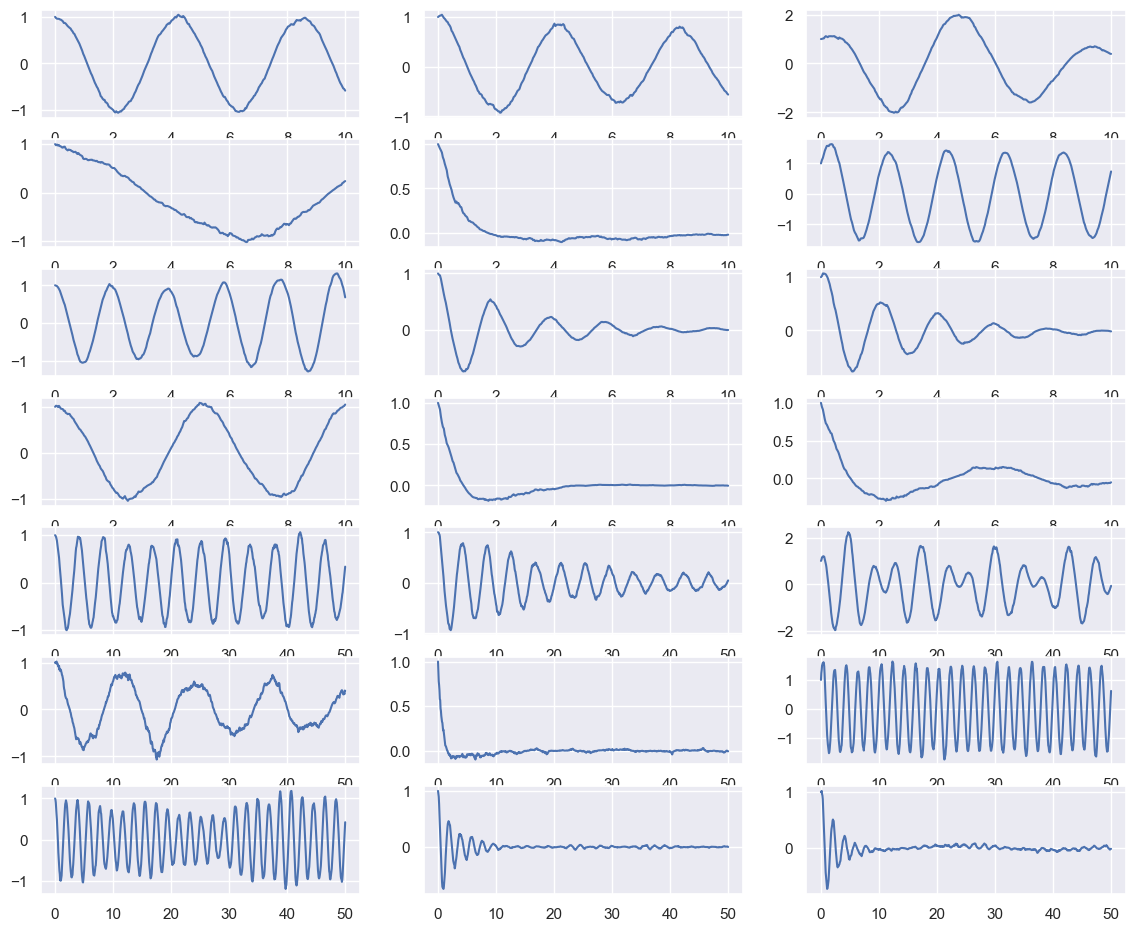

In [4]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(sol_h1.t,sol_h1.y[1])

ax = fig.add_subplot(21,3,4)
plt.plot(sol_h2.t,sol_h2.y[1])

ax = fig.add_subplot(21,3,7)
plt.plot(sol_h3.t,sol_h3.y[1])

ax = fig.add_subplot(21,3,10)
plt.plot(sol_h4.t,sol_h4.y[1])

ax = fig.add_subplot(21,3,13)
plt.plot(sol_h5.t,sol_h5.y[1])

ax = fig.add_subplot(21,3,16)
plt.plot(sol_h6.t,sol_h6.y[1])

ax = fig.add_subplot(21,3,19)
plt.plot(sol_h7.t,sol_h7.y[1])

ax = fig.add_subplot(21,3,2)
plt.plot(sol_d1.t,sol_d1.y[1])

ax = fig.add_subplot(21,3,5)
plt.plot(sol_d2.t,sol_d2.y[1])

ax = fig.add_subplot(21,3,8)
plt.plot(sol_d3.t,sol_d3.y[1])

ax = fig.add_subplot(21,3,11)
plt.plot(sol_d4.t,sol_d4.y[1])

ax = fig.add_subplot(21,3,14)
plt.plot(sol_d5.t,sol_d5.y[1])

ax = fig.add_subplot(21,3,17)
plt.plot(sol_d6.t,sol_d6.y[1])

ax = fig.add_subplot(21,3,20)
plt.plot(sol_d7.t,sol_d7.y[1])

ax = fig.add_subplot(21,3,3)
plt.plot(sol_dr1.t,sol_dr1.y[1])

ax = fig.add_subplot(21,3,6)
plt.plot(sol_dr2.t,sol_dr2.y[1])

ax = fig.add_subplot(21,3,9)
plt.plot(sol_dr3.t,sol_dr3.y[1])

ax = fig.add_subplot(21,3,12)
plt.plot(sol_dr4.t,sol_dr4.y[1])

ax = fig.add_subplot(21,3,15)
plt.plot(sol_dr5.t,sol_dr5.y[1])

ax = fig.add_subplot(21,3,18)
plt.plot(sol_dr6.t,sol_dr6.y[1])

ax = fig.add_subplot(21,3,21)
plt.plot(sol_dr7.t,sol_dr7.y[1])


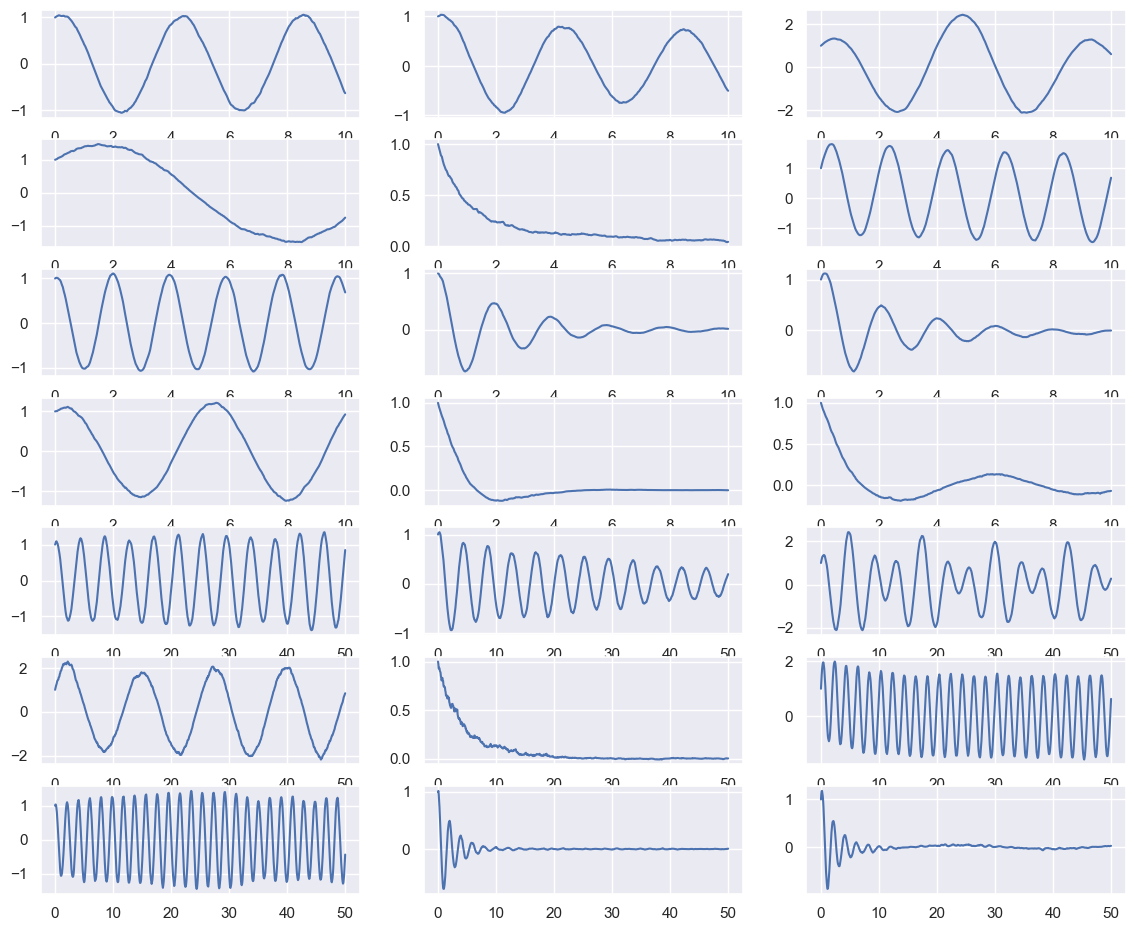

In [5]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(sol_h_g1.t,sol_h_g1.y[1])

ax = fig.add_subplot(21,3,4)
plt.plot(sol_h_g2.t,sol_h_g2.y[1])

ax = fig.add_subplot(21,3,7)
plt.plot(sol_h_g3.t,sol_h_g3.y[1])

ax = fig.add_subplot(21,3,10)
plt.plot(sol_h_g4.t,sol_h_g4.y[1])

ax = fig.add_subplot(21,3,13)
plt.plot(sol_h_g5.t,sol_h_g5.y[1])

ax = fig.add_subplot(21,3,16)
plt.plot(sol_h_g6.t,sol_h_g6.y[1])

ax = fig.add_subplot(21,3,19)
plt.plot(sol_h_g7.t,sol_h_g7.y[1])

ax = fig.add_subplot(21,3,2)
plt.plot(sol_d_g1.t,sol_d_g1.y[1])

ax = fig.add_subplot(21,3,5)
plt.plot(sol_d_g2.t,sol_d_g2.y[1])

ax = fig.add_subplot(21,3,8)
plt.plot(sol_d_g3.t,sol_d_g3.y[1])

ax = fig.add_subplot(21,3,11)
plt.plot(sol_d_g4.t,sol_d_g4.y[1])

ax = fig.add_subplot(21,3,14)
plt.plot(sol_d_g5.t,sol_d_g5.y[1])

ax = fig.add_subplot(21,3,17)
plt.plot(sol_d_g6.t,sol_d_g6.y[1])

ax = fig.add_subplot(21,3,20)
plt.plot(sol_d_g7.t,sol_d_g7.y[1])

ax = fig.add_subplot(21,3,3)
plt.plot(sol_dr_g1.t,sol_dr_g1.y[1])

ax = fig.add_subplot(21,3,6)
plt.plot(sol_dr_g2.t,sol_dr_g2.y[1])

ax = fig.add_subplot(21,3,9)
plt.plot(sol_dr_g3.t,sol_dr_g3.y[1])

ax = fig.add_subplot(21,3,12)
plt.plot(sol_dr_g4.t,sol_dr_g4.y[1])

ax = fig.add_subplot(21,3,15)
plt.plot(sol_dr_g5.t,sol_dr_g5.y[1])

ax = fig.add_subplot(21,3,18)
plt.plot(sol_dr_g6.t,sol_dr_g6.y[1])

ax = fig.add_subplot(21,3,21)
plt.plot(sol_dr_g7.t,sol_dr_g7.y[1])


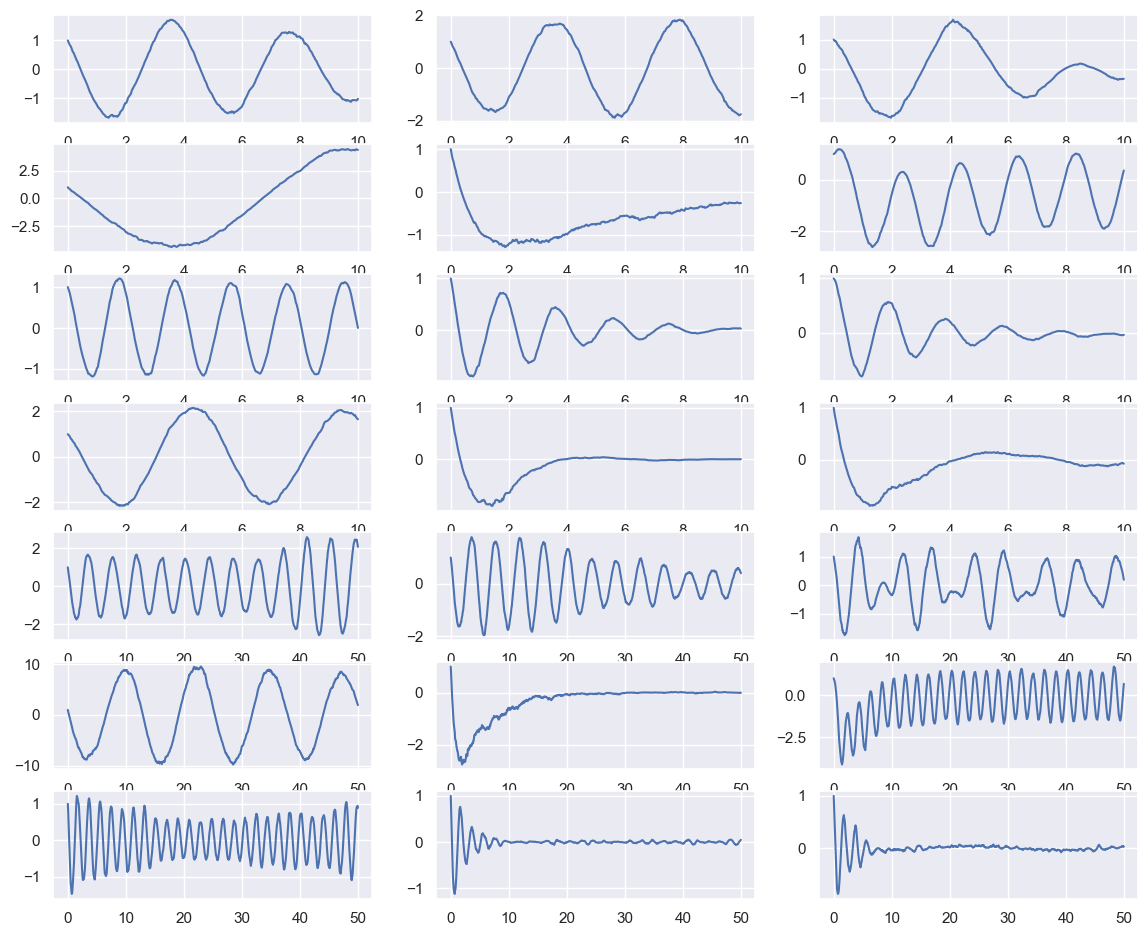

In [6]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(sol_h_p1.t,sol_h_p1.y[1])

ax = fig.add_subplot(21,3,4)
plt.plot(sol_h_p2.t,sol_h_p2.y[1])

ax = fig.add_subplot(21,3,7)
plt.plot(sol_h_p3.t,sol_h_p3.y[1])

ax = fig.add_subplot(21,3,10)
plt.plot(sol_h_p4.t,sol_h_p4.y[1])

ax = fig.add_subplot(21,3,13)
plt.plot(sol_h_p5.t,sol_h_p5.y[1])

ax = fig.add_subplot(21,3,16)
plt.plot(sol_h_p6.t,sol_h_p6.y[1])

ax = fig.add_subplot(21,3,19)
plt.plot(sol_h_p7.t,sol_h_p7.y[1])

ax = fig.add_subplot(21,3,2)
plt.plot(sol_d_p1.t,sol_d_p1.y[1])

ax = fig.add_subplot(21,3,5)
plt.plot(sol_d_p2.t,sol_d_p2.y[1])

ax = fig.add_subplot(21,3,8)
plt.plot(sol_d_p3.t,sol_d_p3.y[1])

ax = fig.add_subplot(21,3,11)
plt.plot(sol_d_p4.t,sol_d_p4.y[1])

ax = fig.add_subplot(21,3,14)
plt.plot(sol_d_p5.t,sol_d_p5.y[1])

ax = fig.add_subplot(21,3,17)
plt.plot(sol_d_p6.t,sol_d_p6.y[1])

ax = fig.add_subplot(21,3,20)
plt.plot(sol_d_p7.t,sol_d_p7.y[1])

ax = fig.add_subplot(21,3,3)
plt.plot(sol_dr_p1.t,sol_dr_p1.y[1])

ax = fig.add_subplot(21,3,6)
plt.plot(sol_dr_p2.t,sol_dr_p2.y[1])

ax = fig.add_subplot(21,3,9)
plt.plot(sol_dr_p3.t,sol_dr_p3.y[1])

ax = fig.add_subplot(21,3,12)
plt.plot(sol_dr_p4.t,sol_dr_p4.y[1])

ax = fig.add_subplot(21,3,15)
plt.plot(sol_dr_p5.t,sol_dr_p5.y[1])

ax = fig.add_subplot(21,3,18)
plt.plot(sol_dr_p6.t,sol_dr_p6.y[1])

ax = fig.add_subplot(21,3,21)
plt.plot(sol_dr_p7.t,sol_dr_p7.y[1])


In [7]:
## 1
#Amplitude Fluctuations:
def amplitude_fluctuacion(time,position):
    amplitude = array(abs(position)) #calc
    #print(array(amplitude))
    mean_amplitude = mean(amplitude) #stad
    std_amplitude = np.std(amplitude)
    fft_result = fft(amplitude)
    frequencies = scipy.fft.fftfreq(len(amplitude), d=(time[1]-time[0]))
    return amplitude, mean_amplitude, std_amplitude, fft_result, frequencies
    #plot(time, amplitude)
    #plot(frequencies[1::], np.abs(fft_result[1::]))
    #xlabel('Frequency (Hz)')
    #ylabel('Magnitude')
    #title('Frequency Spectrum of Amplitude')



In [8]:
amp1,mea1, std1, res1, freq1 = amplitude_fluctuacion(sol_h1.t,sol_h1.y[1])
amp2,mea2, std2, res2, freq2 = amplitude_fluctuacion(sol_h2.t,sol_h2.y[1])
amp3,mea3, std3, res3, freq3 = amplitude_fluctuacion(sol_h3.t,sol_h3.y[1])
amp4,mea4, std4, res4, freq4 = amplitude_fluctuacion(sol_h4.t,sol_h4.y[1])
amp5,mea5, std5, res5, freq5 = amplitude_fluctuacion(sol_h5.t,sol_h5.y[1])
amp6,mea6, std6, res6, freq6 = amplitude_fluctuacion(sol_h6.t,sol_h6.y[1])
amp7,mea7, std7, res7, freq7 = amplitude_fluctuacion(sol_h7.t,sol_h7.y[1])

ampd1,mead1, stdd1, resd1, freqd1 = amplitude_fluctuacion(sol_d1.t,sol_d1.y[1])
ampd2,mead2, stdd2, resd2, freqd2 = amplitude_fluctuacion(sol_d2.t,sol_d2.y[1])
ampd3,mead3, stdd3, resd3, freqd3 = amplitude_fluctuacion(sol_d3.t,sol_d3.y[1])
ampd4,mead4, stdd4, resd4, freqd4 = amplitude_fluctuacion(sol_d4.t,sol_d4.y[1])
ampd5,mead5, stdd5, resd5, freqd5 = amplitude_fluctuacion(sol_d5.t,sol_d5.y[1])
ampd6,mead6, stdd6, resd6, freqd6 = amplitude_fluctuacion(sol_d6.t,sol_d6.y[1])
ampd7,mead7, stdd7, resd7, freqd7 = amplitude_fluctuacion(sol_d7.t,sol_d7.y[1])

ampdr1,meadr1, stddr1, resdr1, freqdr1 = amplitude_fluctuacion(sol_dr1.t,sol_dr1.y[1])
ampdr2,meadr2, stddr2, resdr2, freqdr2 = amplitude_fluctuacion(sol_dr2.t,sol_dr2.y[1])
ampdr3,meadr3, stddr3, resdr3, freqdr3 = amplitude_fluctuacion(sol_dr3.t,sol_dr3.y[1])
ampdr4,meadr4, stddr4, resdr4, freqdr4 = amplitude_fluctuacion(sol_dr4.t,sol_dr4.y[1])
ampdr5,meadr5, stddr5, resdr5, freqdr5 = amplitude_fluctuacion(sol_dr5.t,sol_dr5.y[1])
ampdr6,meadr6, stddr6, resdr6, freqdr6 = amplitude_fluctuacion(sol_dr6.t,sol_dr6.y[1])
ampdr7,meadr7, stddr7, resdr7, freqdr7 = amplitude_fluctuacion(sol_dr7.t,sol_dr7.y[1])


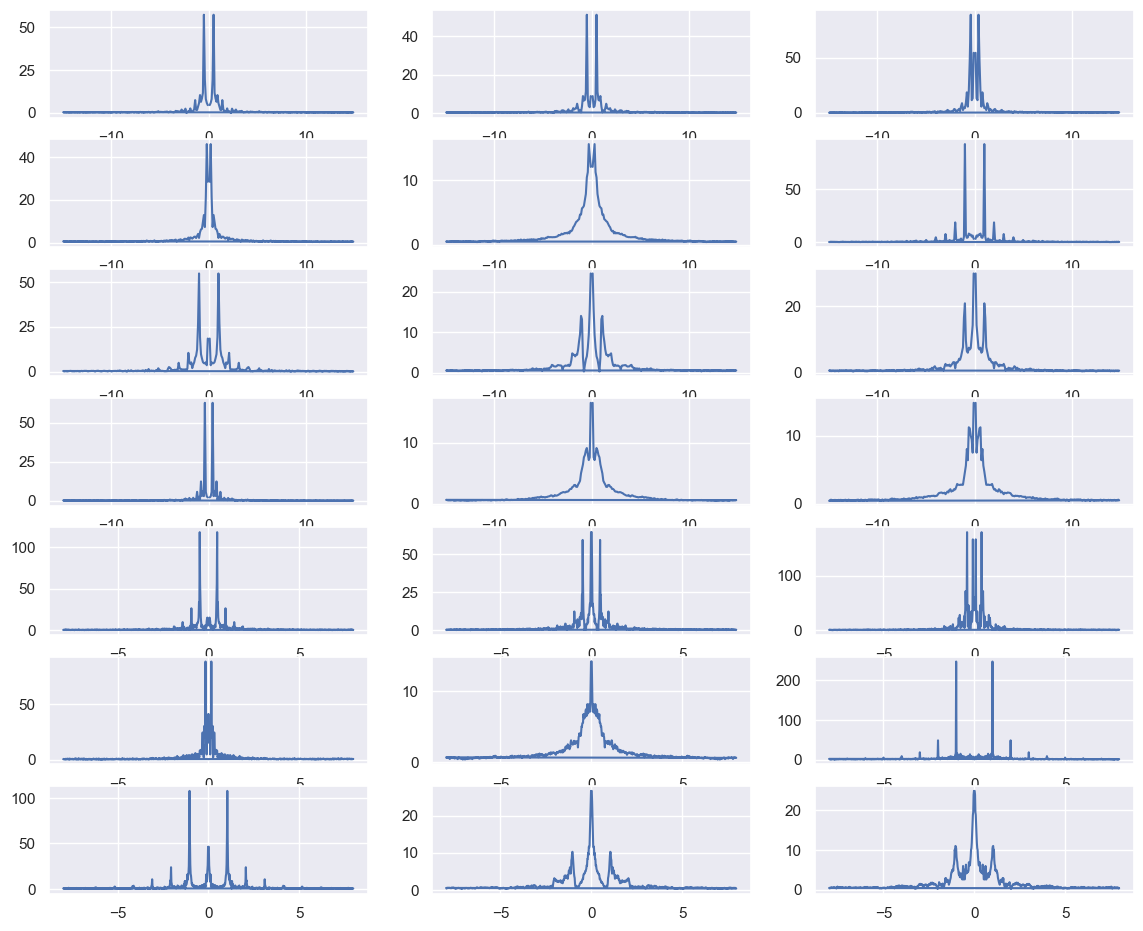

In [9]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(freq1[1::], np.abs(res1[1::]))

ax = fig.add_subplot(21,3,4)
plt.plot(freq2[1::], np.abs(res2[1::]))

ax = fig.add_subplot(21,3,7)
plt.plot(freq3[1::], np.abs(res3[1::]))

ax = fig.add_subplot(21,3,10)
plt.plot(freq4[1::], np.abs(res4[1::]))

ax = fig.add_subplot(21,3,13)
plt.plot(freq5[1::], np.abs(res5[1::]))

ax = fig.add_subplot(21,3,16)
plt.plot(freq6[1::], np.abs(res6[1::]))

ax = fig.add_subplot(21,3,19)
plt.plot(freq7[1::], np.abs(res7[1::]))

ax = fig.add_subplot(21,3,2)
plt.plot(freqd1[1::], np.abs(resd1[1::]))

ax = fig.add_subplot(21,3,5)
plt.plot(freqd2[1::], np.abs(resd2[1::]))

ax = fig.add_subplot(21,3,8)
plt.plot(freqd3[1::], np.abs(resd3[1::]))

ax = fig.add_subplot(21,3,11)
plt.plot(freqd4[1::], np.abs(resd4[1::]))

ax = fig.add_subplot(21,3,14)
plt.plot(freqd5[1::], np.abs(resd5[1::]))

ax = fig.add_subplot(21,3,17)
plt.plot(freqd6[1::], np.abs(resd6[1::]))

ax = fig.add_subplot(21,3,20)
plt.plot(freqd7[1::], np.abs(resd7[1::]))

ax = fig.add_subplot(21,3,3)
plt.plot(freqdr1[1::], np.abs(resdr1[1::]))

ax = fig.add_subplot(21,3,6)
plt.plot(freqdr2[1::], np.abs(resdr2[1::]))

ax = fig.add_subplot(21,3,9)
plt.plot(freqdr3[1::], np.abs(resdr3[1::]))

ax = fig.add_subplot(21,3,12)
plt.plot(freqdr4[1::], np.abs(resdr4[1::]))

ax = fig.add_subplot(21,3,15)
plt.plot(freqdr5[1::], np.abs(resdr5[1::]))

ax = fig.add_subplot(21,3,18)
plt.plot(freqdr6[1::], np.abs(resdr6[1::]))

ax = fig.add_subplot(21,3,21)
plt.plot(freqdr7[1::], np.abs(resdr7[1::]))


In [10]:
wamp1,wmea1, wstd1, wres1, wfreq1 = amplitude_fluctuacion(sol_h_g1.t,sol_h_g1.y[1])
wamp2,wmea2, wstd2, wres2, wfreq2 = amplitude_fluctuacion(sol_h_g2.t,sol_h_g2.y[1])
wamp3,wmea3, wstd3, wres3, wfreq3 = amplitude_fluctuacion(sol_h_g3.t,sol_h_g3.y[1])
wamp4,wmea4, wstd4, wres4, wfreq4 = amplitude_fluctuacion(sol_h_g4.t,sol_h_g4.y[1])
wamp5,wmea5, wstd5, wres5, wfreq5 = amplitude_fluctuacion(sol_h_g5.t,sol_h_g5.y[1])
wamp6,wmea6, wstd6, wres6, wfreq6 = amplitude_fluctuacion(sol_h_g6.t,sol_h_g6.y[1])
wamp7,wmea7, wstd7, wres7, wfreq7 = amplitude_fluctuacion(sol_h_g7.t,sol_h_g7.y[1])

wampd1,wmead1, wstdd1, wresd1, wfreqd1 = amplitude_fluctuacion(sol_d_g1.t,sol_d_g1.y[1])
wampd2,wmead2, wstdd2, wresd2, wfreqd2 = amplitude_fluctuacion(sol_d_g2.t,sol_d_g2.y[1])
wampd3,wmead3, wstdd3, wresd3, wfreqd3 = amplitude_fluctuacion(sol_d_g3.t,sol_d_g3.y[1])
wampd4,wmead4, wstdd4, wresd4, wfreqd4 = amplitude_fluctuacion(sol_d_g4.t,sol_d_g4.y[1])
wampd5,wmead5, wstdd5, wresd5, wfreqd5 = amplitude_fluctuacion(sol_d_g5.t,sol_d_g5.y[1])
wampd6,wmead6, wstdd6, wresd6, wfreqd6 = amplitude_fluctuacion(sol_d_g6.t,sol_d_g6.y[1])
wampd7,wmead7, wstdd7, wresd7, wfreqd7 = amplitude_fluctuacion(sol_d_g7.t,sol_d_g7.y[1])

wampdr1,wmeadr1, wstddr1, wresdr1, wfreqdr1 = amplitude_fluctuacion(sol_dr_g1.t,sol_dr_g1.y[1])
wampdr2,wmeadr2, wstddr2, wresdr2, wfreqdr2 = amplitude_fluctuacion(sol_dr_g2.t,sol_dr_g2.y[1])
wampdr3,wmeadr3, wstddr3, wresdr3, wfreqdr3 = amplitude_fluctuacion(sol_dr_g3.t,sol_dr_g3.y[1])
wampdr4,wmeadr4, wstddr4, wresdr4, wfreqdr4 = amplitude_fluctuacion(sol_dr_g4.t,sol_dr_g4.y[1])
wampdr5,wmeadr5, wstddr5, wresdr5, wfreqdr5 = amplitude_fluctuacion(sol_dr_g5.t,sol_dr_g5.y[1])
wampdr6,wmeadr6, wstddr6, wresdr6, wfreqdr6 = amplitude_fluctuacion(sol_dr_g6.t,sol_dr_g6.y[1])
wampdr7,wmeadr7, wstddr7, wresdr7, wfreqdr7 = amplitude_fluctuacion(sol_dr_g7.t,sol_dr_g7.y[1])


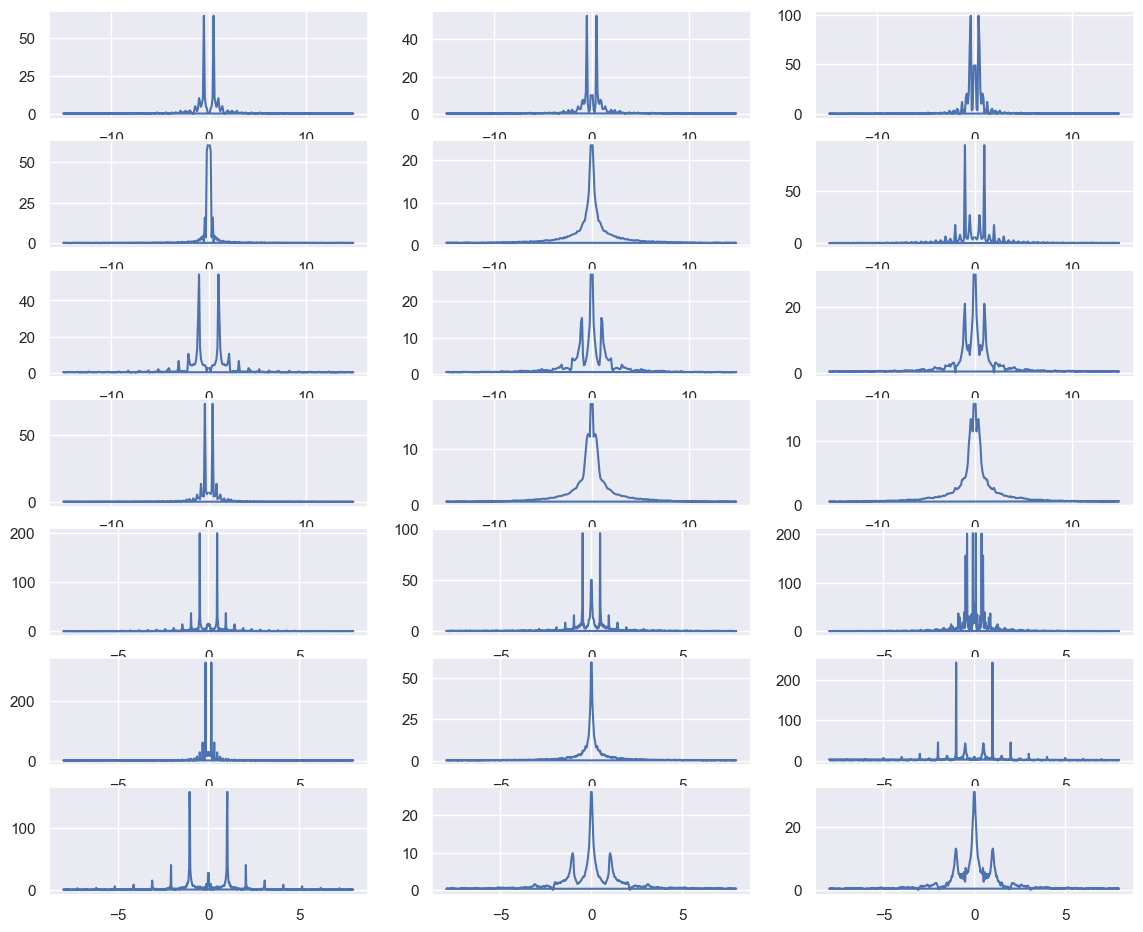

In [11]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(wfreq1[1::], np.abs(wres1[1::]))

ax = fig.add_subplot(21,3,4)
plt.plot(wfreq2[1::], np.abs(wres2[1::]))

ax = fig.add_subplot(21,3,7)
plt.plot(wfreq3[1::], np.abs(wres3[1::]))

ax = fig.add_subplot(21,3,10)
plt.plot(wfreq4[1::], np.abs(wres4[1::]))

ax = fig.add_subplot(21,3,13)
plt.plot(wfreq5[1::], np.abs(wres5[1::]))

ax = fig.add_subplot(21,3,16)
plt.plot(wfreq6[1::], np.abs(wres6[1::]))

ax = fig.add_subplot(21,3,19)
plt.plot(wfreq7[1::], np.abs(wres7[1::]))

ax = fig.add_subplot(21,3,2)
plt.plot(wfreqd1[1::], np.abs(wresd1[1::]))

ax = fig.add_subplot(21,3,5)
plt.plot(wfreqd2[1::], np.abs(wresd2[1::]))

ax = fig.add_subplot(21,3,8)
plt.plot(wfreqd3[1::], np.abs(wresd3[1::]))

ax = fig.add_subplot(21,3,11)
plt.plot(wfreqd4[1::], np.abs(wresd4[1::]))

ax = fig.add_subplot(21,3,14)
plt.plot(wfreqd5[1::], np.abs(wresd5[1::]))

ax = fig.add_subplot(21,3,17)
plt.plot(wfreqd6[1::], np.abs(wresd6[1::]))

ax = fig.add_subplot(21,3,20)
plt.plot(wfreqd7[1::], np.abs(wresd7[1::]))

ax = fig.add_subplot(21,3,3)
plt.plot(wfreqdr1[1::], np.abs(wresdr1[1::]))

ax = fig.add_subplot(21,3,6)
plt.plot(wfreqdr2[1::], np.abs(wresdr2[1::]))

ax = fig.add_subplot(21,3,9)
plt.plot(wfreqdr3[1::], np.abs(wresdr3[1::]))

ax = fig.add_subplot(21,3,12)
plt.plot(wfreqdr4[1::], np.abs(wresdr4[1::]))

ax = fig.add_subplot(21,3,15)
plt.plot(wfreqdr5[1::], np.abs(wresdr5[1::]))

ax = fig.add_subplot(21,3,18)
plt.plot(wfreqdr6[1::], np.abs(wresdr6[1::]))

ax = fig.add_subplot(21,3,21)
plt.plot(wfreqdr7[1::], np.abs(wresdr7[1::]))


In [12]:
pamp1,pmea1, pstd1, pres1, pfreq1 = amplitude_fluctuacion(sol_h_p1.t,sol_h_p1.y[1])
pamp2,pmea2, pstd2, pres2, pfreq2 = amplitude_fluctuacion(sol_h_p2.t,sol_h_p2.y[1])
pamp3,pmea3, pstd3, pres3, pfreq3 = amplitude_fluctuacion(sol_h_p3.t,sol_h_p3.y[1])
pamp4,pmea4, pstd4, pres4, pfreq4 = amplitude_fluctuacion(sol_h_p4.t,sol_h_p4.y[1])
pamp5,pmea5, pstd5, pres5, pfreq5 = amplitude_fluctuacion(sol_h_p5.t,sol_h_p5.y[1])
pamp6,pmea6, pstd6, pres6, pfreq6 = amplitude_fluctuacion(sol_h_p6.t,sol_h_p6.y[1])
pamp7,pmea7, pstd7, pres7, pfreq7 = amplitude_fluctuacion(sol_h_p7.t,sol_h_p7.y[1])

pampd1,pmead1, pstdd1, presd1, pfreqd1 = amplitude_fluctuacion(sol_d_p1.t,sol_d_p1.y[1])
pampd2,pmead2, pstdd2, presd2, pfreqd2 = amplitude_fluctuacion(sol_d_p2.t,sol_d_p2.y[1])
pampd3,pmead3, pstdd3, presd3, pfreqd3 = amplitude_fluctuacion(sol_d_p3.t,sol_d_p3.y[1])
pampd4,pmead4, pstdd4, presd4, pfreqd4 = amplitude_fluctuacion(sol_d_p4.t,sol_d_p4.y[1])
pampd5,pmead5, pstdd5, presd5, pfreqd5 = amplitude_fluctuacion(sol_d_p5.t,sol_d_p5.y[1])
pampd6,pmead6, pstdd6, presd6, pfreqd6 = amplitude_fluctuacion(sol_d_p6.t,sol_d_p6.y[1])
pampd7,pmead7, pstdd7, presd7, pfreqd7 = amplitude_fluctuacion(sol_d_p7.t,sol_d_p7.y[1])

pampdr1,pmeadr1, pstddr1, presdr1, pfreqdr1 = amplitude_fluctuacion(sol_dr_p1.t,sol_dr_p1.y[1])
pampdr2,pmeadr2, pstddr2, presdr2, pfreqdr2 = amplitude_fluctuacion(sol_dr_p2.t,sol_dr_p2.y[1])
pampdr3,pmeadr3, pstddr3, presdr3, pfreqdr3 = amplitude_fluctuacion(sol_dr_p3.t,sol_dr_p3.y[1])
pampdr4,pmeadr4, pstddr4, presdr4, pfreqdr4 = amplitude_fluctuacion(sol_dr_p4.t,sol_dr_p4.y[1])
pampdr5,pmeadr5, pstddr5, presdr5, pfreqdr5 = amplitude_fluctuacion(sol_dr_p5.t,sol_dr_p5.y[1])
pampdr6,pmeadr6, pstddr6, presdr6, pfreqdr6 = amplitude_fluctuacion(sol_dr_p6.t,sol_dr_p6.y[1])
pampdr7,pmeadr7, pstddr7, presdr7, pfreqdr7 = amplitude_fluctuacion(sol_dr_p7.t,sol_dr_p7.y[1])


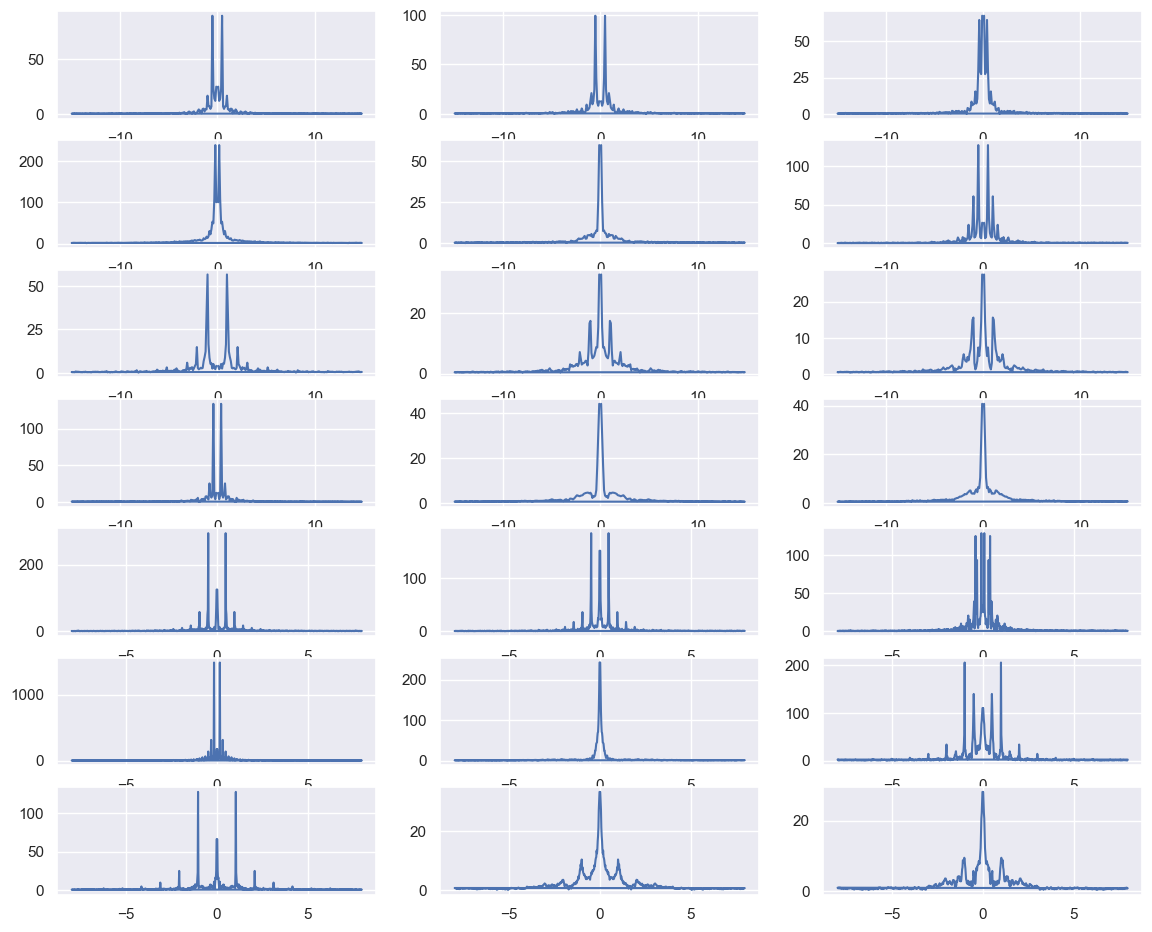

In [13]:
fig = plt.figure(figsize = (14,35))
ax = fig.add_subplot(21,3,1)
plt.plot(pfreq1[1::], np.abs(pres1[1::]))

ax = fig.add_subplot(21,3,4)
plt.plot(pfreq2[1::], np.abs(pres2[1::]))

ax = fig.add_subplot(21,3,7)
plt.plot(pfreq3[1::], np.abs(pres3[1::]))

ax = fig.add_subplot(21,3,10)
plt.plot(pfreq4[1::], np.abs(pres4[1::]))

ax = fig.add_subplot(21,3,13)
plt.plot(pfreq5[1::], np.abs(pres5[1::]))

ax = fig.add_subplot(21,3,16)
plt.plot(pfreq6[1::], np.abs(pres6[1::]))

ax = fig.add_subplot(21,3,19)
plt.plot(pfreq7[1::], np.abs(pres7[1::]))

ax = fig.add_subplot(21,3,2)
plt.plot(pfreqd1[1::], np.abs(presd1[1::]))

ax = fig.add_subplot(21,3,5)
plt.plot(pfreqd2[1::], np.abs(presd2[1::]))

ax = fig.add_subplot(21,3,8)
plt.plot(pfreqd3[1::], np.abs(presd3[1::]))

ax = fig.add_subplot(21,3,11)
plt.plot(pfreqd4[1::], np.abs(presd4[1::]))

ax = fig.add_subplot(21,3,14)
plt.plot(pfreqd5[1::], np.abs(presd5[1::]))

ax = fig.add_subplot(21,3,17)
plt.plot(pfreqd6[1::], np.abs(presd6[1::]))

ax = fig.add_subplot(21,3,20)
plt.plot(pfreqd7[1::], np.abs(presd7[1::]))

ax = fig.add_subplot(21,3,3)
plt.plot(pfreqdr1[1::], np.abs(presdr1[1::]))

ax = fig.add_subplot(21,3,6)
plt.plot(pfreqdr2[1::], np.abs(presdr2[1::]))

ax = fig.add_subplot(21,3,9)
plt.plot(pfreqdr3[1::], np.abs(presdr3[1::]))

ax = fig.add_subplot(21,3,12)
plt.plot(pfreqdr4[1::], np.abs(presdr4[1::]))

ax = fig.add_subplot(21,3,15)
plt.plot(pfreqdr5[1::], np.abs(presdr5[1::]))

ax = fig.add_subplot(21,3,18)
plt.plot(pfreqdr6[1::], np.abs(presdr6[1::]))

ax = fig.add_subplot(21,3,21)
plt.plot(pfreqdr7[1::], np.abs(presdr7[1::]))


After the plots, and furier plots, I choose the last 3 run. All three is enoght different to each other, and have some similar to the first four. Here I choose longer time intervall, so in the last three case we can investigate the behavior better. 

In [14]:
def freq_response(w_2, damping_coeff):
      # Logarithmically spaced frequencies
    amp_0 = [];phas_0 = []
    amp_n = [];phas_n = []
    amp_w = [];phas_w = []
    amp_p = [];phas_p = []
    for omega in frequencies:
    
        omega_0 = np.sqrt(w_2) # angular freq
        H_0 = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff * omega ) #transfer
        H_n = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff * omega ) +1/ ( OscillatorSimulator.noise_gauss() +1j)
        H_w = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff * omega ) +1/ ( OscillatorSimulator.white_noise_uniform() +1j)
        H_p = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff * omega ) +1/ ( OscillatorSimulator.pink_noise() +1j)
                   
        amplitude_0 = abs(H_0);phase_0 = angle(H_0, deg=True) 
        amplitude_n = abs(H_n);phase_n = angle(H_n, deg=True)
        amplitude_w = abs(H_w);phase_w = angle(H_w, deg=True)
        amplitude_p = abs(H_p);phase_p = angle(H_p, deg=True)

        amp_0.append(amplitude_0);phas_0.append(phase_0)
        amp_n.append(amplitude_n);phas_n.append(phase_n)
        amp_w.append(amplitude_w);phas_w.append(phase_w)
        amp_p.append(amplitude_p);phas_p.append(phase_p)
    
    return amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p
frequencies = np.logspace(-1, 1, 100)

amp_0 = [];phas_0 = [];amp_n = [];phas_n = [];amp_w = [];phas_w = [];amp_p = [];phas_p = []
amp_01 = [];phas_01 = [];amp_n1 = [];phas_n1 = [];amp_w1 = [];phas_w1 = [];amp_p1 = [];phas_p1 = []
amp_02 = [];phas_02 = [];amp_n2 = [];phas_n2 = [];amp_w2 = [];phas_w2 = [];amp_p2 = [];phas_p2 = []

amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p = freq_response(2.25,0.05)
amp_01,phas_01, amp_n1,phas_n1, amp_w1,phas_w1, amp_p1,phas_p1 = freq_response(0.25,1.5)
amp_02,phas_02, amp_n2,phas_n2, amp_w2,phas_w2, amp_p2,phas_p2 = freq_response(10.5,.75)
    
#plt.semilogx(frequencies, amplitudes)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
#plt.title('Frequency Response: Amplitude vs. Frequency')
# Phase vs. Frequency
#plt.subplot(2, 1, 2)
#plt.semilogx(frequencies, phases)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Phase (degrees)')
#plt.title('Frequency Response: Phase vs. Frequency')

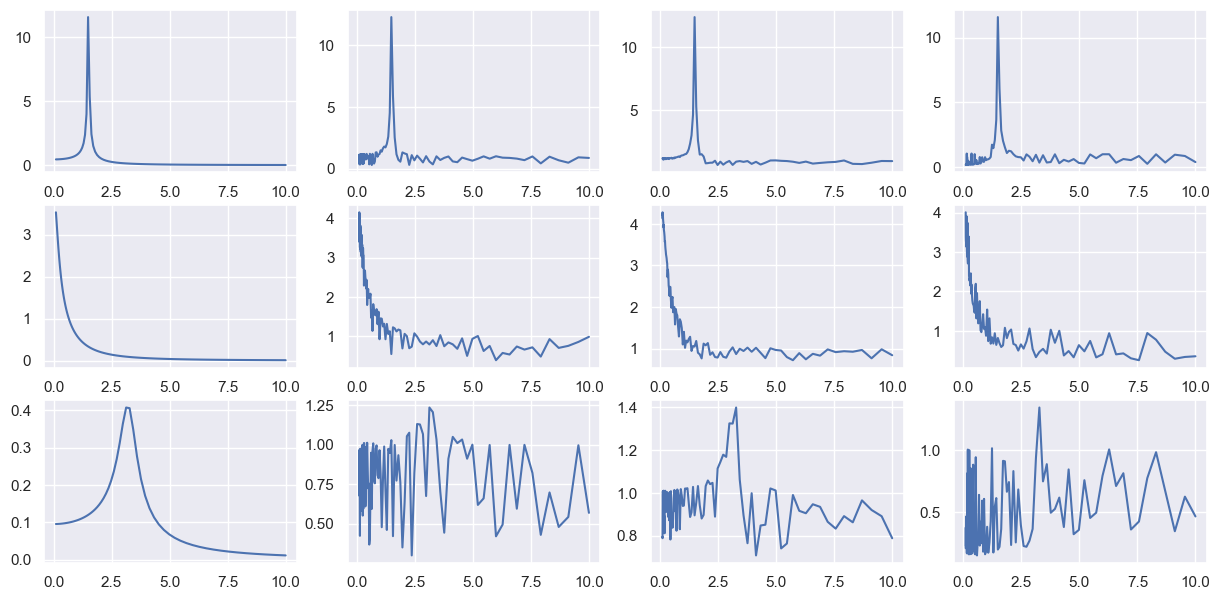

In [15]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, amp_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, amp_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, amp_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, amp_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, amp_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, amp_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, amp_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, amp_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, amp_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, amp_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, amp_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, amp_p2)


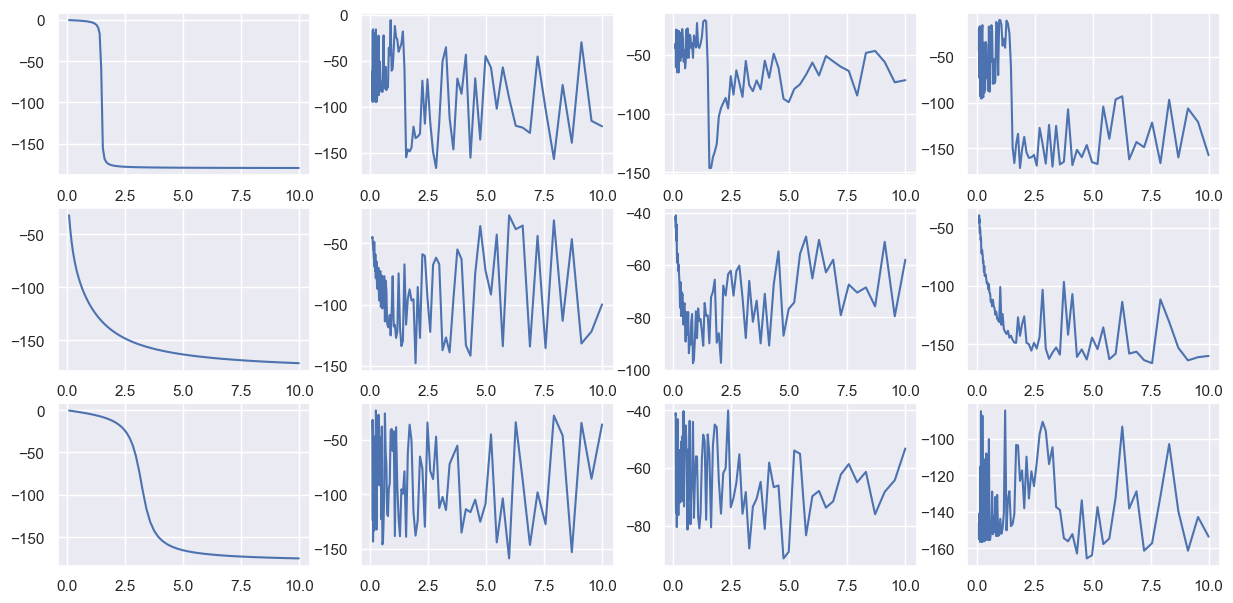

In [16]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, phas_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, phas_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, phas_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, phas_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, phas_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, phas_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, phas_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, phas_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, phas_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, phas_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, phas_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, phas_p2)


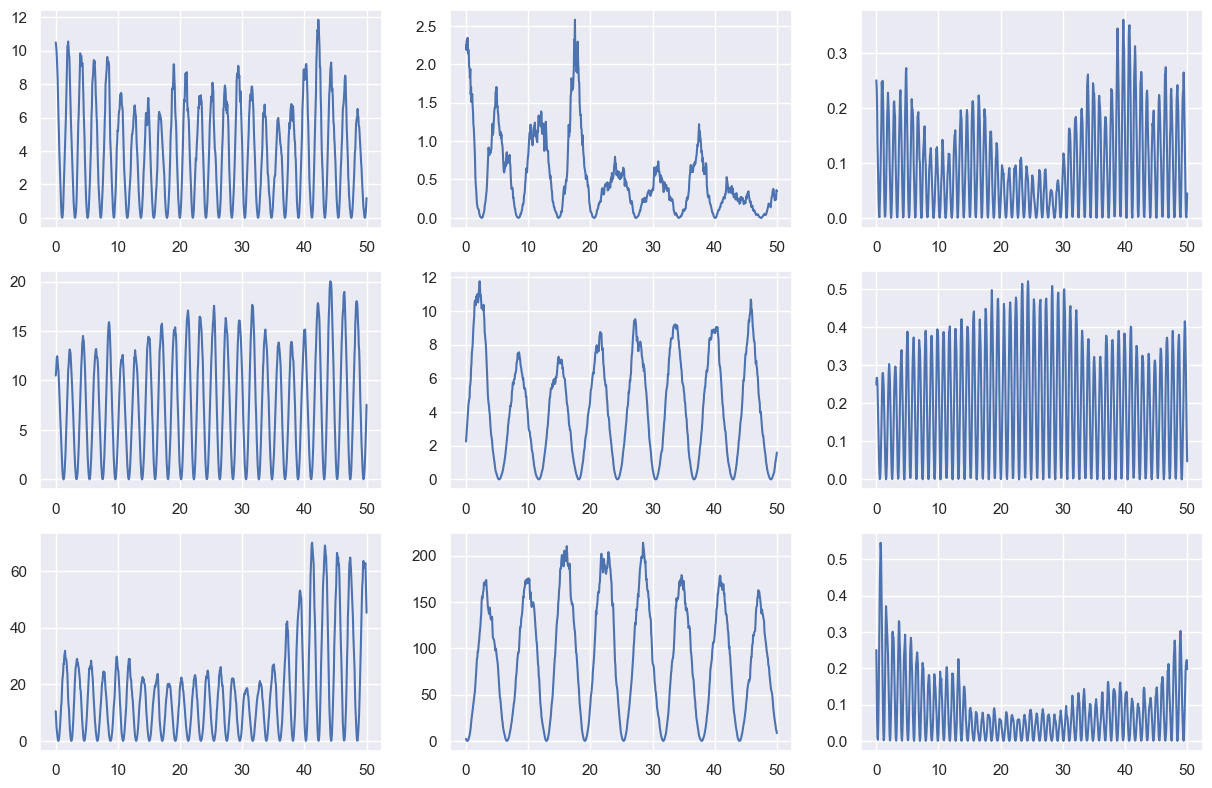

In [17]:
#nono gut
w_2_1=2.25;w_2_2=0.25;w_2_3=10.5;
h_energies6=w_2_1 * sol_h6.y[1]**2
h_energies7=w_2_2 * sol_h7.y[1]**2
h_energies5=w_2_3 * sol_h5.y[1]**2

w_energies6=w_2_1 * sol_h_g6.y[1]**2
w_energies7=w_2_2 * sol_h_g7.y[1]**2
w_energies5=w_2_3 * sol_h_g5.y[1]**2

p_energies6=w_2_1 * sol_h_p6.y[1]**2
p_energies7=w_2_2 * sol_h_p7.y[1]**2
p_energies5=w_2_3 * sol_h_p5.y[1]**2


fig = plt.figure(figsize = (15,30))
#plt.title('Total Energy and Time')
ax = fig.add_subplot(9,3,1)
plot(sol_h5.t,h_energies5)
ax = fig.add_subplot(9,3,2)
plot(sol_h6.t,h_energies6)
ax = fig.add_subplot(9,3,3)
plot(sol_h7.t,h_energies7)

ax = fig.add_subplot(9,3,4)
plot(sol_h5.t,w_energies5)
ax = fig.add_subplot(9,3,5)
plot(sol_h6.t,w_energies6)
ax = fig.add_subplot(9,3,6)
plot(sol_h7.t,w_energies7)

ax = fig.add_subplot(9,3,7)
plot(sol_h5.t,p_energies5)
ax = fig.add_subplot(9,3,8)
plot(sol_h6.t,p_energies6)
ax = fig.add_subplot(9,3,9)
plot(sol_h7.t,p_energies7)



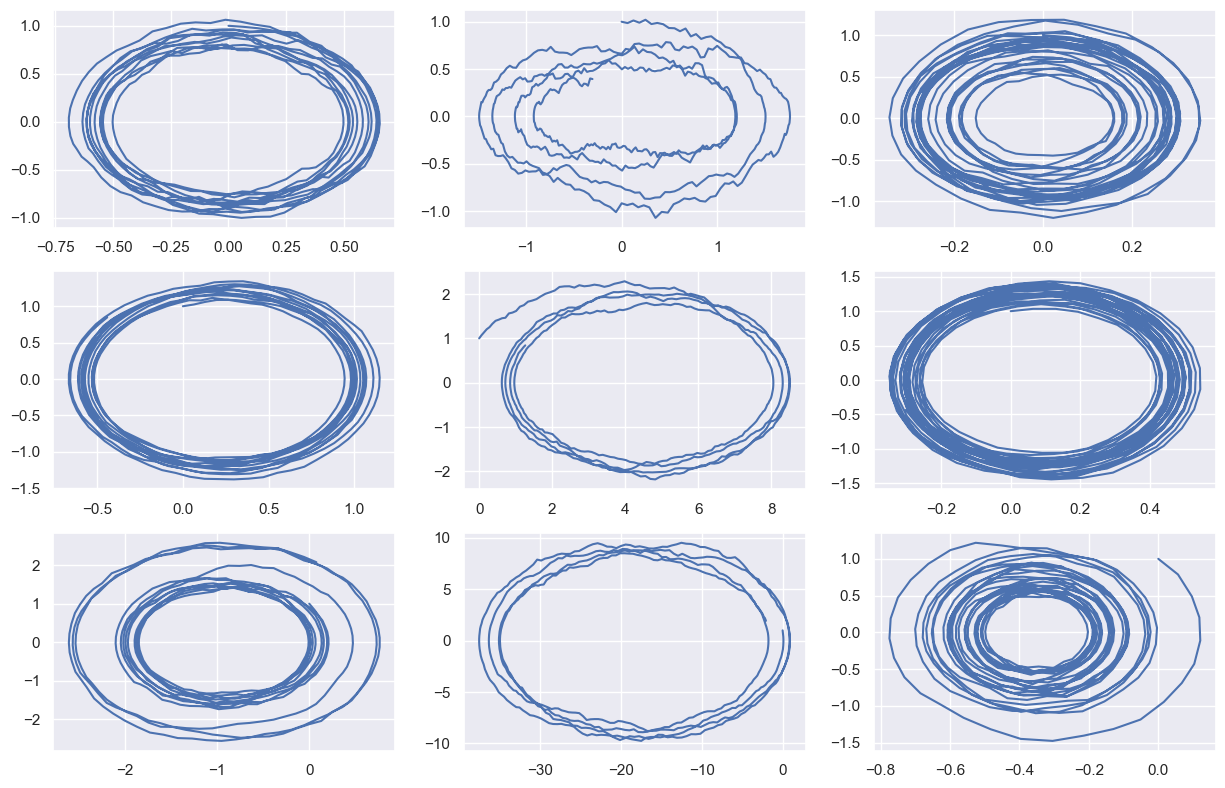

In [18]:
#4 Phase space analysis
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(9,3,1)
plot(sol_h5.y[0],sol_h5.y[1])
ax = fig.add_subplot(9,3,2)
plot(sol_h6.y[0],sol_h6.y[1])
ax = fig.add_subplot(9,3,3)
plot(sol_h7.y[0],sol_h7.y[1])

ax = fig.add_subplot(9,3,4)
plot(sol_h_g5.y[0],sol_h_g5.y[1])
ax = fig.add_subplot(9,3,5)
plot(sol_h_g6.y[0],sol_h_g6.y[1])
ax = fig.add_subplot(9,3,6)
plot(sol_h_g7.y[0],sol_h_g7.y[1])

ax = fig.add_subplot(9,3,7)
plot(sol_h_p5.y[0],sol_h_p5.y[1])
ax = fig.add_subplot(9,3,8)
plot(sol_h_p6.y[0],sol_h_p6.y[1])
ax = fig.add_subplot(9,3,9)
plot(sol_h_p7.y[0],sol_h_p7.y[1])

Text(0.5, 1.0, 'Power Spectral Density (PSD)')

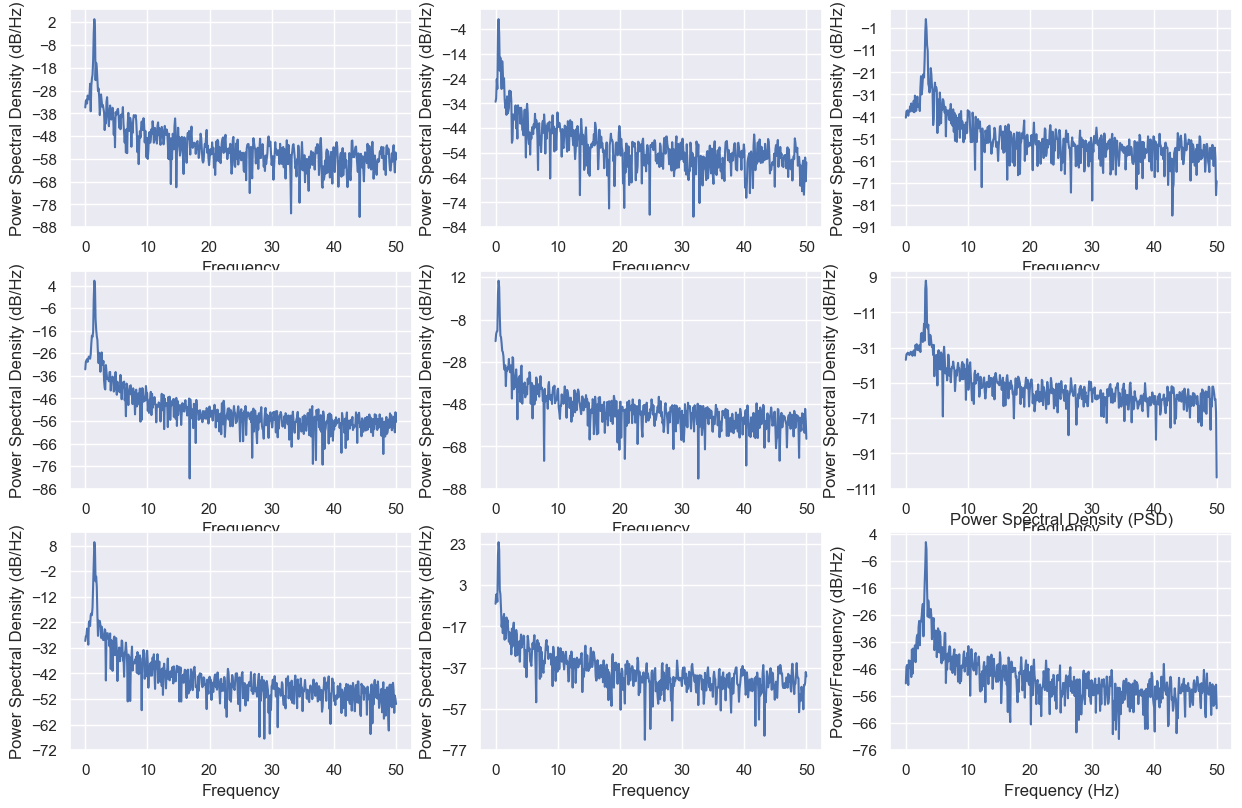

In [19]:
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(9,3,1)
plt.psd(sol_h5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,2)
plt.psd(sol_h6.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,3)
plt.psd(sol_h7.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,4)
plt.psd(sol_h_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,5)
plt.psd(sol_h_g6.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,6)
plt.psd(sol_h_g7.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,7)
plt.psd(sol_h_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,8)
plt.psd(sol_h_p6.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,9)
plt.psd(sol_h_p7.y[1], Fs=100, NFFT=1024, noverlap=512)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD)')

Text(0, 0.5, 'Frequency (dB/Hz)')

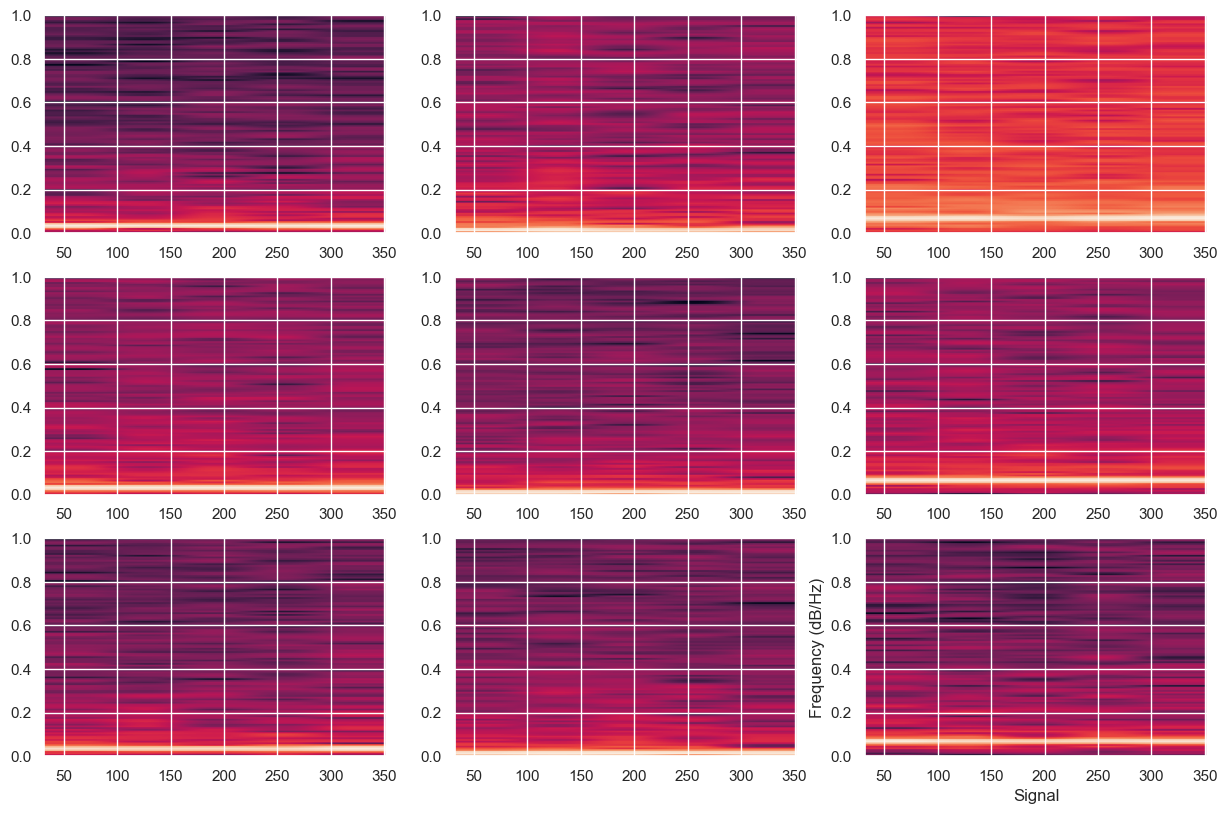

In [20]:
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(9,3,1)
plt.specgram(sol_h5.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,2)
plt.specgram(sol_h6.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,3)
plt.specgram(sol_h7.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,4)
plt.specgram(sol_h_g5.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,5)
plt.specgram(sol_h_g6.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,6)
plt.specgram(sol_h_g7.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,7)
plt.specgram(sol_h_p5.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,8)
plt.specgram(sol_h_p6.y[1])#, Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(9,3,9)
plt.specgram(sol_h_p7.y[1])#, Fs=100, NFFT=1024, noverlap=512)

plt.xlabel('Signal')
plt.ylabel('Frequency (dB/Hz)')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

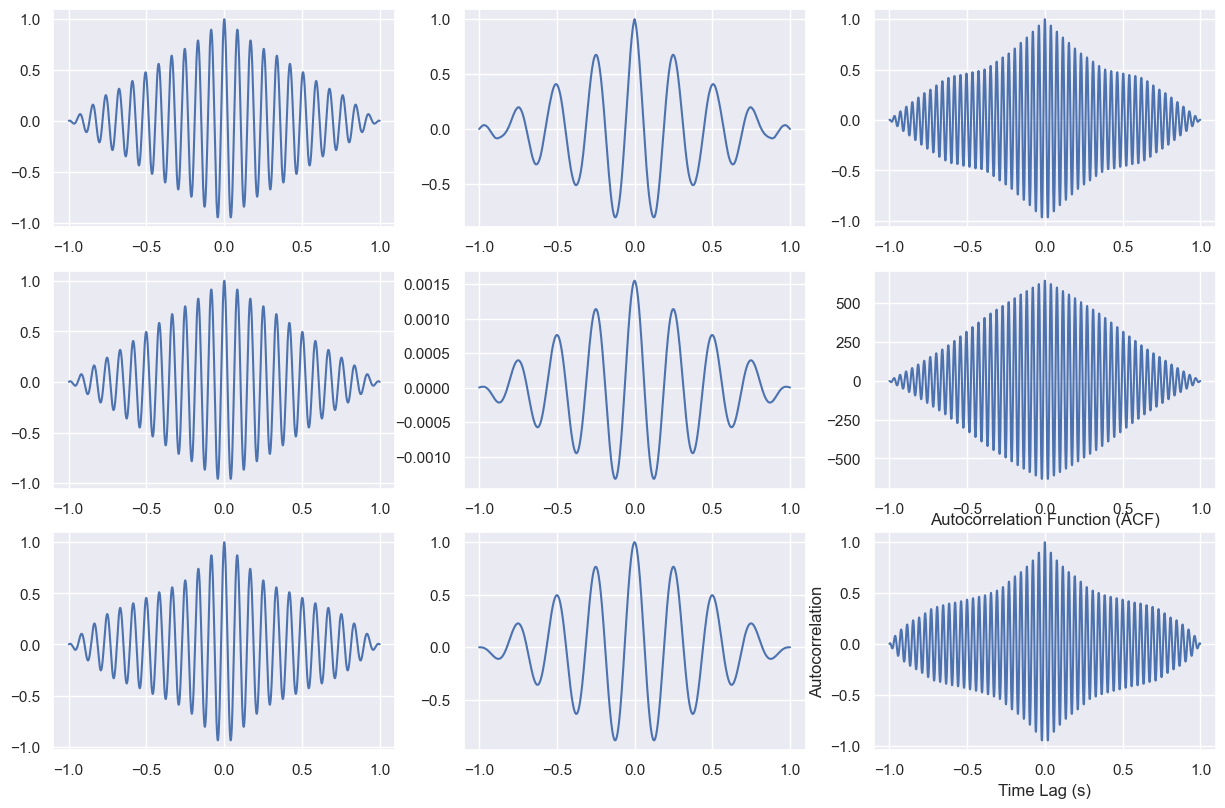

In [21]:
#6 Autocorrelation Function python
lags = arange(-800 + 1,800)
#self corr
acf_5 = correlate(sol_h5.y[1], sol_h5.y[1], mode='full')
acf_5 /= max(acf_5) 
acf_6 = correlate(sol_h6.y[1], sol_h6.y[1], mode='full')
acf_6 /= max(acf_6)
acf_7 = correlate(sol_h7.y[1], sol_h7.y[1], mode='full')
acf_7 /= max(acf_7)


acf_w5 = correlate(sol_h_g5.y[1], sol_h_g5.y[1], mode='full')
acf_w5 /= max(acf_w5)
acf_w6 = correlate(sol_h_g6.y[1], sol_h_g6.y[1], mode='full')
acf_w6 /= max(acf_w6)
acf_w7 = correlate(sol_h_g7.y[1], sol_h_g7.y[1], mode='full')
acf_w6 /= max(acf_w7)

acf_p5 = correlate(sol_h_p5.y[1], sol_h_p5.y[1], mode='full') 
acf_p5 /= max(acf_p5)
acf_p6 = correlate(sol_h_p6.y[1], sol_h_p6.y[1], mode='full')
acf_p6 /= max(acf_p6)
acf_p7 = correlate(sol_h_p7.y[1], sol_h_p7.y[1], mode='full')
acf_p7 /= max(acf_p7)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(9,3,1)
plot(lags / 800, acf_5)

ax = fig.add_subplot(9,3,2)
plot(lags / 800, acf_6)

ax = fig.add_subplot(9,3,3)
plot(lags / 800, acf_7)

ax = fig.add_subplot(9,3,4)
plot(lags / 800, acf_w5)

ax = fig.add_subplot(9,3,5)
plot(lags / 800, acf_w6)

ax = fig.add_subplot(9,3,6)
plot(lags / 800, acf_w7)

ax = fig.add_subplot(9,3,7)
plot(lags / 800, acf_p5)

ax = fig.add_subplot(9,3,8)
plot(lags / 800, acf_p6)

ax = fig.add_subplot(9,3,9)
plot(lags / 800, acf_p7)



plt.xlabel('Time Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')


In [1]:
#7 time avg
def time_avg(signal):
    window_size = 3
    num_windows = int(signal.t[-1]-signal.t[0]) // window_size
    avgs = []

    for i in range(num_windows):
        window_start = i * window_size
        window_end = (i + 1) * window_size
        window_data = signal.y[1][window_start:window_end]
        window_average = np.mean(window_data)
        avgs.append(window_average)
    avg_t = np.linspace(0, 800, num_windows)
    return avg_t, avgs

avg_t5, avgs5= time_avg(sol_h5)
avg_t6, avgs6= time_avg(sol_h6)
avg_t7, avgs7= time_avg(sol_h7)

avg_tw5, avgsw5= time_avg(sol_h_g5)
avg_tw6, avgsw6= time_avg(sol_h_g6)
avg_tw7, avgsw7= time_avg(sol_h_g7)

avg_tp5, avgsp5= time_avg(sol_h_p5)
avg_tp6, avgsp6= time_avg(sol_h_p6)
avg_tp7, avgsp7= time_avg(sol_h_p7)

fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(9,3,1)
plot(avg_t5, avgs5)
ax = fig.add_subplot(9,3,2)
plot(avg_t6, avgs6)
ax = fig.add_subplot(9,3,3)
plot(avg_t7, avgs7)

ax = fig.add_subplot(9,3,4)
plot(avg_tw5, avgsw5)
ax = fig.add_subplot(9,3,5)
plot(avg_tw6, avgsw6)
ax = fig.add_subplot(9,3,6)
plot(avg_tw7, avgsw7)

ax = fig.add_subplot(9,3,7)
plot(avg_t5, avgsp5)
ax = fig.add_subplot(9,3,8)
plot(avg_tp6, avgsp6)
ax = fig.add_subplot(9,3,9)
plot(avg_tp7, avgsp7)

#plt.plot(averaged_t, averages)
#plt.xlabel('Time (s)')
#plt.ylabel('Average Amplitude')
#plt.title('Time-Averaged Signal')

NameError: name 'sol_h5' is not defined

In [23]:
## extra stabilyti and bifuc 
